In [1]:
import numpy as np
import pandas as pd
import time
import graphviz
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

k = 64

census_data = pd.read_csv('ano-data/titanic/'+str(k)+'_titanic.csv',header = 0,sep=',',engine='python',na_values='?')
census_test = pd.read_csv('ano-data/titanic/'+str(1)+'_titanic_test.csv',header = 0,sep=',',engine='python',na_values='?')

census_data.drop(census_data.columns[0], axis=1,inplace = True)
census_test.drop(census_test.columns[0], axis=1,inplace = True)

data_feature = census_data.drop(columns=['Survived']).copy()
data_label = census_data['Survived'].copy()

test_feature = census_test.drop(columns=['Survived']).copy()
test_label = census_test['Survived'].copy()

def Accuracy(predicted, truth):
    correct = 0
    for i in range(len(predicted)):
        if predicted[i]==truth.iloc[i]:
            correct +=1
    return correct/len(predicted)

print("Minimum expected accuracy: "+str(data_label.value_counts().max()/data_label.value_counts().sum()*100))
print("Minimum expected accuracy: "+str(test_label.value_counts().max()/test_label.value_counts().sum()*100))

Minimum expected accuracy: 59.55056179775281
Minimum expected accuracy: 61.631419939577036


In [2]:
#Converting labels to 0-1
for i in range(data_label.shape[0]):
    data_label.iloc[i]=int("1" in str(data_label.iloc[i]))
for i in range(test_label.shape[0]):
    test_label.iloc[i]=int("1" in str(test_label.iloc[i]))

In [3]:
#NOSCALE
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

data_feature, val_feature, data_label, val_label = train_test_split(data_feature, data_label, test_size=0.15, random_state=42,stratify = data_label)

SIZES = [2,4,8,16,32,64]
times = np.zeros(len(SIZES))
accs = np.zeros(len(SIZES))

for i in range(len(SIZES)):
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim = SIZES[i], init = 'uniform', activation = 'relu', input_dim = data_feature.shape[1]))
    # Adding the second hidden layer
    classifier.add(Dense(output_dim = SIZES[i], init = 'uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    clb = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)]
    start = time.time()
    classifier.fit(data_feature, data_label, batch_size = 8, nb_epoch = 100,validation_data=(val_feature,val_label),callbacks=clb)
    times[i]=time.time()-start
    y_pred = classifier.predict(test_feature)
    y_pred = np.array([int(y>0.5) for y in y_pred])
    accs[i]=Accuracy(y_pred,test_label)

/home/pkovacs/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=2, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python

Train on 605 samples, validate on 107 samples
Epoch 1/100
605/605 [==============================] - 1s 2ms/step - loss: 0.6898 - acc: 0.6033 - val_loss: 0.6845 - val_acc: 0.6075
Epoch 2/100
605/605 [==============================] - 0s 274us/step - loss: 0.6733 - acc: 0.6347 - val_loss: 0.6576 - val_acc: 0.6916
Epoch 3/100
605/605 [==============================] - 0s 280us/step - loss: 0.6416 - acc: 0.6645 - val_loss: 0.6284 - val_acc: 0.6636
Epoch 4/100
605/605 [==============================] - 0s 277us/step - loss: 0.6151 - acc: 0.6793 - val_loss: 0.6127 - val_acc: 0.6542
Epoch 5/100
605/605 [==============================] - 0s 287us/step - loss: 0.5994 - acc: 0.6793 - val_loss: 0.6088 - val_acc: 0.6822
Epoch 6/100
605/605 [==============================] - 0s 280us/step - loss: 0.5901 - acc: 0.6876 - val_loss: 0.6066 - val_acc: 0.6729
Epoch 7/100
605/605 [==============================] - 0s 275us/step - loss: 0.5818 - acc: 0.6876 - val_loss: 0.6007 - val_acc: 0.6729
Epoch 8/100

Epoch 61/100
605/605 [==============================] - 0s 260us/step - loss: 0.4599 - acc: 0.7835 - val_loss: 0.4944 - val_acc: 0.7664
Epoch 62/100
605/605 [==============================] - 0s 260us/step - loss: 0.4608 - acc: 0.7818 - val_loss: 0.4970 - val_acc: 0.7664


/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=4, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`


Train on 605 samples, validate on 107 samples
Epoch 1/100
605/605 [==============================] - 0s 652us/step - loss: 0.6903 - acc: 0.5950 - val_loss: 0.6845 - val_acc: 0.5981
Epoch 2/100
605/605 [==============================] - 0s 266us/step - loss: 0.6742 - acc: 0.5950 - val_loss: 0.6552 - val_acc: 0.5981
Epoch 3/100
605/605 [==============================] - 0s 260us/step - loss: 0.6495 - acc: 0.5950 - val_loss: 0.6380 - val_acc: 0.5981
Epoch 4/100
605/605 [==============================] - 0s 257us/step - loss: 0.6348 - acc: 0.5950 - val_loss: 0.6318 - val_acc: 0.5981
Epoch 5/100
605/605 [==============================] - 0s 263us/step - loss: 0.6252 - acc: 0.5950 - val_loss: 0.6273 - val_acc: 0.5981
Epoch 6/100
605/605 [==============================] - 0s 266us/step - loss: 0.6178 - acc: 0.5950 - val_loss: 0.6246 - val_acc: 0.5981
Epoch 7/100
605/605 [==============================] - 0s 263us/step - loss: 0.6108 - acc: 0.5934 - val_loss: 0.6213 - val_acc: 0.6916
Epoch 8/1

Epoch 61/100
605/605 [==============================] - 0s 263us/step - loss: 0.4769 - acc: 0.7818 - val_loss: 0.5100 - val_acc: 0.7664
Epoch 62/100
605/605 [==============================] - 0s 270us/step - loss: 0.4752 - acc: 0.7835 - val_loss: 0.5094 - val_acc: 0.7664
Epoch 63/100
605/605 [==============================] - 0s 265us/step - loss: 0.4772 - acc: 0.7851 - val_loss: 0.5128 - val_acc: 0.7570
Epoch 64/100
605/605 [==============================] - 0s 268us/step - loss: 0.4756 - acc: 0.7917 - val_loss: 0.5091 - val_acc: 0.7570
Epoch 65/100
605/605 [==============================] - 0s 263us/step - loss: 0.4763 - acc: 0.7868 - val_loss: 0.5083 - val_acc: 0.7664
Epoch 66/100
605/605 [==============================] - 0s 265us/step - loss: 0.4734 - acc: 0.7835 - val_loss: 0.5081 - val_acc: 0.7570
Epoch 67/100
605/605 [==============================] - 0s 283us/step - loss: 0.4733 - acc: 0.7818 - val_loss: 0.5104 - val_acc: 0.7570
Epoch 68/100
605/605 [==========================

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=8, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`


Train on 605 samples, validate on 107 samples
Epoch 1/100
605/605 [==============================] - 0s 772us/step - loss: 0.6887 - acc: 0.6099 - val_loss: 0.6772 - val_acc: 0.6542
Epoch 2/100
605/605 [==============================] - 0s 263us/step - loss: 0.6547 - acc: 0.6479 - val_loss: 0.6262 - val_acc: 0.6636
Epoch 3/100
605/605 [==============================] - 0s 261us/step - loss: 0.6125 - acc: 0.6678 - val_loss: 0.6058 - val_acc: 0.6916
Epoch 4/100
605/605 [==============================] - 0s 260us/step - loss: 0.5964 - acc: 0.6777 - val_loss: 0.6050 - val_acc: 0.6822
Epoch 5/100
605/605 [==============================] - 0s 275us/step - loss: 0.5810 - acc: 0.6942 - val_loss: 0.6004 - val_acc: 0.6822
Epoch 6/100
605/605 [==============================] - 0s 260us/step - loss: 0.5719 - acc: 0.6876 - val_loss: 0.5978 - val_acc: 0.6916
Epoch 7/100
605/605 [==============================] - 0s 260us/step - loss: 0.5619 - acc: 0.6893 - val_loss: 0.5929 - val_acc: 0.6729
Epoch 8/1

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=16, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`


Train on 605 samples, validate on 107 samples
Epoch 1/100
605/605 [==============================] - 0s 731us/step - loss: 0.6801 - acc: 0.6149 - val_loss: 0.6527 - val_acc: 0.6636
Epoch 2/100
605/605 [==============================] - 0s 269us/step - loss: 0.6249 - acc: 0.6645 - val_loss: 0.6118 - val_acc: 0.6822
Epoch 3/100
605/605 [==============================] - 0s 264us/step - loss: 0.5890 - acc: 0.6826 - val_loss: 0.6012 - val_acc: 0.6729
Epoch 4/100
605/605 [==============================] - 0s 262us/step - loss: 0.5707 - acc: 0.6909 - val_loss: 0.5944 - val_acc: 0.6729
Epoch 5/100
605/605 [==============================] - 0s 265us/step - loss: 0.5571 - acc: 0.7091 - val_loss: 0.5967 - val_acc: 0.6822
Epoch 6/100
605/605 [==============================] - 0s 268us/step - loss: 0.5344 - acc: 0.7207 - val_loss: 0.5634 - val_acc: 0.7196
Epoch 7/100
605/605 [==============================] - 0s 264us/step - loss: 0.5304 - acc: 0.7471 - val_loss: 0.5501 - val_acc: 0.7570
Epoch 8/1

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=32, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`


Train on 605 samples, validate on 107 samples
Epoch 1/100
605/605 [==============================] - 0s 765us/step - loss: 0.6546 - acc: 0.6479 - val_loss: 0.6123 - val_acc: 0.6729
Epoch 2/100
605/605 [==============================] - 0s 266us/step - loss: 0.5976 - acc: 0.6694 - val_loss: 0.6289 - val_acc: 0.6729
Epoch 3/100
605/605 [==============================] - 0s 265us/step - loss: 0.5742 - acc: 0.6926 - val_loss: 0.6177 - val_acc: 0.6729
Epoch 4/100
605/605 [==============================] - 0s 270us/step - loss: 0.5567 - acc: 0.6959 - val_loss: 0.5987 - val_acc: 0.6916
Epoch 5/100
605/605 [==============================] - 0s 267us/step - loss: 0.5398 - acc: 0.7306 - val_loss: 0.5691 - val_acc: 0.7290
Epoch 6/100
605/605 [==============================] - 0s 263us/step - loss: 0.5297 - acc: 0.7537 - val_loss: 0.5696 - val_acc: 0.7290
Epoch 7/100
605/605 [==============================] - 0s 266us/step - loss: 0.5062 - acc: 0.7736 - val_loss: 0.5827 - val_acc: 0.7383
Epoch 8/1

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=64, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`


Train on 605 samples, validate on 107 samples
Epoch 1/100
605/605 [==============================] - 0s 806us/step - loss: 0.6381 - acc: 0.6579 - val_loss: 0.6096 - val_acc: 0.6916
Epoch 2/100
605/605 [==============================] - 0s 268us/step - loss: 0.5865 - acc: 0.6810 - val_loss: 0.6054 - val_acc: 0.6916
Epoch 3/100
605/605 [==============================] - 0s 288us/step - loss: 0.5611 - acc: 0.6959 - val_loss: 0.5779 - val_acc: 0.6916
Epoch 4/100
605/605 [==============================] - 0s 279us/step - loss: 0.5375 - acc: 0.7504 - val_loss: 0.5469 - val_acc: 0.7477
Epoch 5/100
605/605 [==============================] - 0s 286us/step - loss: 0.5049 - acc: 0.7653 - val_loss: 0.5249 - val_acc: 0.7757
Epoch 6/100
605/605 [==============================] - 0s 276us/step - loss: 0.4940 - acc: 0.7736 - val_loss: 0.5168 - val_acc: 0.7757
Epoch 7/100
605/605 [==============================] - 0s 265us/step - loss: 0.4839 - acc: 0.7818 - val_loss: 0.5188 - val_acc: 0.7664
Epoch 8/1

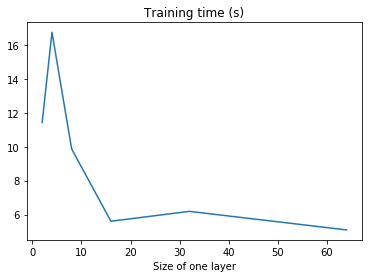

In [4]:
plt.plot(SIZES,times)
plt.xlabel("Size of one layer")
plt.title("Training time (s)")
plt.savefig("CensusIncome_NN_traintime_noscaled.png")

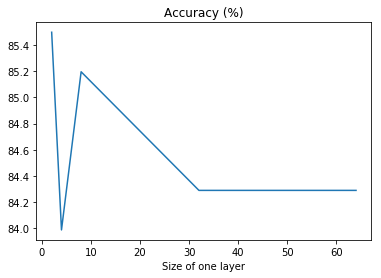

In [5]:
plt.plot(SIZES,accs*100)
plt.xlabel("Size of one layer")
plt.title("Accuracy (%)")
plt.savefig("CensusIncome_NN_Accuracy_noscaled.png")

In [6]:
##############################################TODO#######################################################################
#A HOLDOUT OR CROSSVALIDATION HAS TO BE ADDED TO KNOW WHEN TO STOP THE TRAINING.
#This can be added in a Callback func

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

#This fckin scaling is unreasonably important, without this the training radomly jumps and gets stuck in a bad place...
#include this in the report, maybe with some shown examples.... (I have no idea why it happens.)

sc = StandardScaler()
data_feature = sc.fit_transform(data_feature)
test_feature = sc.transform(test_feature)

data_feature, val_feature, data_label, val_label = train_test_split(data_feature, data_label, test_size=0.15, random_state=42,stratify = data_label)

SIZES = [2,4,8,16,32,64]
times_scal = np.zeros(len(SIZES))
accs_scal = np.zeros(len(SIZES))

for i in range(len(SIZES)):
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim = SIZES[i], init = 'uniform', activation = 'relu', input_dim = data_feature.shape[1]))
    # Adding the second hidden layer
    classifier.add(Dense(output_dim = SIZES[i], init = 'uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    clb = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)]
    start = time.time()
    classifier.fit(data_feature, data_label, batch_size = 8, nb_epoch = 100,validation_data=(val_feature,val_label),callbacks=clb)
    times_scal[i]=time.time()-start
    y_pred = classifier.predict(test_feature)
    y_pred = np.array([int(y>0.5) for y in y_pred])
    accs_scal[i]=Accuracy(y_pred,test_label)

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=2, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 514 samples, validate on 91 samples
Epoch 1/100
514/514 [==============================] - 1s 1ms/step - loss: 0.6911 - acc: 0.5973 - val_loss: 0.6886 - val_acc: 0.5934
Epoch 2/100
514/514 [==============================] - 0s 297us/step - loss: 0.6838 - acc: 0.6926 - val_loss: 0.6766 - val_acc: 0.7802
Epoch 3/100
514/514 [==============================] - 0s 406us/step - loss: 0.6653 - acc: 0.7821 - val_loss: 0.6513 - val_acc: 0.8132
Epoch 4/100
514/514 [==============================] - 0s 371us/step - loss: 0.6365 - acc: 0.7802 - val_loss: 0.6199 - val_acc: 0.8132
Epoch 5/100
514/514 [==============================] - 0s 356us/step - loss: 0.6097 - acc: 0.7821 - val_loss: 0.5948 - val_acc: 0.8132
Epoch 6/100
514/514 [==============================] - 0s 330us/step - loss: 0.5909 - acc: 0.7821 - val_loss: 0.5793 - val_acc: 0.8132
Epoch 7/100
514/514 [==============================] - 0s 305us/step - loss: 0.5778 - acc: 0.7821 - val_loss: 0.5672 - val_acc: 0.8132
Epoch 8/100


Epoch 61/100
514/514 [==============================] - 0s 303us/step - loss: 0.4506 - acc: 0.7957 - val_loss: 0.4522 - val_acc: 0.7692
Epoch 62/100
514/514 [==============================] - 0s 304us/step - loss: 0.4495 - acc: 0.7957 - val_loss: 0.4527 - val_acc: 0.7692
Epoch 63/100
514/514 [==============================] - 0s 303us/step - loss: 0.4492 - acc: 0.7957 - val_loss: 0.4529 - val_acc: 0.7692
Epoch 64/100
514/514 [==============================] - 0s 334us/step - loss: 0.4487 - acc: 0.7977 - val_loss: 0.4511 - val_acc: 0.7692
Epoch 65/100
514/514 [==============================] - 0s 314us/step - loss: 0.4475 - acc: 0.7996 - val_loss: 0.4506 - val_acc: 0.7692
Epoch 66/100
514/514 [==============================] - 0s 335us/step - loss: 0.4476 - acc: 0.7957 - val_loss: 0.4498 - val_acc: 0.7692
Epoch 67/100
514/514 [==============================] - 0s 324us/step - loss: 0.4475 - acc: 0.7918 - val_loss: 0.4490 - val_acc: 0.7582
Epoch 68/100
514/514 [==========================

/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=4, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`


Train on 514 samples, validate on 91 samples
Epoch 1/100
514/514 [==============================] - 1s 1ms/step - loss: 0.6913 - acc: 0.5856 - val_loss: 0.6878 - val_acc: 0.5934
Epoch 2/100
514/514 [==============================] - 0s 299us/step - loss: 0.6755 - acc: 0.5973 - val_loss: 0.6526 - val_acc: 0.6154
Epoch 3/100
514/514 [==============================] - 0s 294us/step - loss: 0.6218 - acc: 0.7529 - val_loss: 0.5772 - val_acc: 0.7802
Epoch 4/100
514/514 [==============================] - 0s 290us/step - loss: 0.5591 - acc: 0.7763 - val_loss: 0.5263 - val_acc: 0.7912
Epoch 5/100
514/514 [==============================] - 0s 298us/step - loss: 0.5240 - acc: 0.7821 - val_loss: 0.4954 - val_acc: 0.7912
Epoch 6/100
514/514 [==============================] - 0s 297us/step - loss: 0.5010 - acc: 0.7821 - val_loss: 0.4788 - val_acc: 0.7912
Epoch 7/100
514/514 [==============================] - 0s 298us/step - loss: 0.4892 - acc: 0.7860 - val_loss: 0.4704 - val_acc: 0.7912
Epoch 8/100


/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=8, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`


Train on 514 samples, validate on 91 samples
Epoch 1/100
514/514 [==============================] - 1s 1ms/step - loss: 0.6873 - acc: 0.5914 - val_loss: 0.6682 - val_acc: 0.5934
Epoch 2/100
514/514 [==============================] - 0s 275us/step - loss: 0.6291 - acc: 0.6109 - val_loss: 0.5604 - val_acc: 0.7912
Epoch 3/100
514/514 [==============================] - 0s 275us/step - loss: 0.5598 - acc: 0.7665 - val_loss: 0.5154 - val_acc: 0.7473
Epoch 4/100
514/514 [==============================] - 0s 275us/step - loss: 0.5158 - acc: 0.7743 - val_loss: 0.4820 - val_acc: 0.7912
Epoch 5/100
514/514 [==============================] - 0s 275us/step - loss: 0.4888 - acc: 0.7763 - val_loss: 0.4647 - val_acc: 0.7582
Epoch 6/100
514/514 [==============================] - 0s 287us/step - loss: 0.4766 - acc: 0.7821 - val_loss: 0.4533 - val_acc: 0.7912
Epoch 7/100
514/514 [==============================] - 0s 276us/step - loss: 0.4686 - acc: 0.7840 - val_loss: 0.4487 - val_acc: 0.7912
Epoch 8/100


/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=16, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`


Train on 514 samples, validate on 91 samples
Epoch 1/100
514/514 [==============================] - 1s 1ms/step - loss: 0.6829 - acc: 0.6848 - val_loss: 0.6418 - val_acc: 0.7912
Epoch 2/100
514/514 [==============================] - 0s 274us/step - loss: 0.5695 - acc: 0.7821 - val_loss: 0.4758 - val_acc: 0.8132
Epoch 3/100
514/514 [==============================] - 0s 277us/step - loss: 0.4929 - acc: 0.7802 - val_loss: 0.4547 - val_acc: 0.8132
Epoch 4/100
514/514 [==============================] - 0s 281us/step - loss: 0.4731 - acc: 0.7821 - val_loss: 0.4471 - val_acc: 0.7582
Epoch 5/100
514/514 [==============================] - 0s 279us/step - loss: 0.4630 - acc: 0.7665 - val_loss: 0.4472 - val_acc: 0.7912
Epoch 6/100
514/514 [==============================] - 0s 290us/step - loss: 0.4570 - acc: 0.7665 - val_loss: 0.4421 - val_acc: 0.7363
Epoch 7/100
514/514 [==============================] - 0s 296us/step - loss: 0.4486 - acc: 0.7802 - val_loss: 0.4404 - val_acc: 0.7473
Epoch 8/100


/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=32, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`


Train on 514 samples, validate on 91 samples
Epoch 1/100
514/514 [==============================] - 1s 1ms/step - loss: 0.6517 - acc: 0.7257 - val_loss: 0.5360 - val_acc: 0.7802
Epoch 2/100
514/514 [==============================] - 0s 279us/step - loss: 0.5136 - acc: 0.7685 - val_loss: 0.4673 - val_acc: 0.8132
Epoch 3/100
514/514 [==============================] - 0s 283us/step - loss: 0.4692 - acc: 0.7724 - val_loss: 0.4390 - val_acc: 0.7582
Epoch 4/100
514/514 [==============================] - 0s 360us/step - loss: 0.4584 - acc: 0.7704 - val_loss: 0.4369 - val_acc: 0.7692
Epoch 5/100
514/514 [==============================] - 0s 365us/step - loss: 0.4552 - acc: 0.7860 - val_loss: 0.4438 - val_acc: 0.7692
Epoch 6/100
514/514 [==============================] - 0s 283us/step - loss: 0.4427 - acc: 0.7840 - val_loss: 0.4313 - val_acc: 0.7912
Epoch 7/100
514/514 [==============================] - 0s 300us/step - loss: 0.4431 - acc: 0.7782 - val_loss: 0.4391 - val_acc: 0.7692
Epoch 8/100


/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=64, kernel_initializer="uniform")`
/home/pkovacs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`


Train on 514 samples, validate on 91 samples
Epoch 1/100
514/514 [==============================] - 1s 1ms/step - loss: 0.6199 - acc: 0.7471 - val_loss: 0.4770 - val_acc: 0.8242
Epoch 2/100
514/514 [==============================] - 0s 289us/step - loss: 0.4827 - acc: 0.7782 - val_loss: 0.4456 - val_acc: 0.7912
Epoch 3/100
514/514 [==============================] - 0s 289us/step - loss: 0.4576 - acc: 0.7821 - val_loss: 0.4496 - val_acc: 0.7692
Epoch 4/100
514/514 [==============================] - 0s 287us/step - loss: 0.4500 - acc: 0.7821 - val_loss: 0.4475 - val_acc: 0.7363
Epoch 5/100
514/514 [==============================] - 0s 289us/step - loss: 0.4538 - acc: 0.7724 - val_loss: 0.4383 - val_acc: 0.7692
Epoch 6/100
514/514 [==============================] - 0s 287us/step - loss: 0.4425 - acc: 0.7802 - val_loss: 0.4369 - val_acc: 0.7802
Epoch 7/100
514/514 [==============================] - 0s 288us/step - loss: 0.4399 - acc: 0.7879 - val_loss: 0.4383 - val_acc: 0.7912
Epoch 8/100


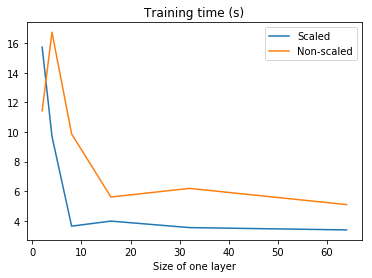

In [7]:
plt.plot(SIZES,times_scal,label = "Scaled")
plt.plot(SIZES,times,label = "Non-scaled")
plt.xlabel("Size of one layer")
plt.title("Training time (s)")
plt.legend()
plt.savefig("CensusIncome_NN_traintime.png")

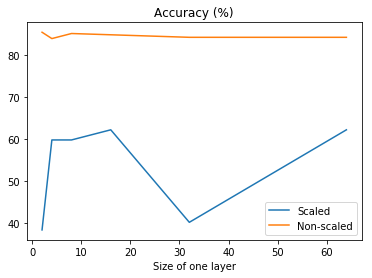

In [8]:
plt.plot(SIZES,accs_scal*100,label = "Scaled")
plt.plot(SIZES,accs*100,label = 'Non-scaled')
plt.xlabel("Size of one layer")
plt.title("Accuracy (%)")
plt.legend()
plt.savefig("CensusIncome_NN_Accuracy.png")

In [9]:
classifier.predict(test_feature)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],